In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, TensorBoard
import keras

In [2]:
# Load song lyrics from a text file
with open('adele.txt', 'r') as file:
    lyrics = file.read()

In [3]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([lyrics])
total_words = len(tokenizer.word_index) + 1

In [4]:
# Create input sequences and labels
input_sequences = []
for line in lyrics.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [5]:
# Pad sequences to the length of the longest sequence
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [6]:
# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# One-hot encode labels
y = np.eye(total_words)[y]

In [7]:
# Build a LSTM model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [8]:
# Define callbacks for training
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', write_graph=True)

In [9]:
# Fit the model with callbacks
history = model.fit(X, y, epochs=100, verbose=1, callbacks=[model_checkpoint, tensorboard])

Epoch 1/100
520/520 [==============================] - ETA: 0s - loss: 5.7936

520/520 [==============================] - 36s 64ms/step - loss: 5.7936
Epoch 2/100
519/520 [============================>.] - ETA: 0s - loss: 5.3233

520/520 [==============================] - 34s 66ms/step - loss: 5.3231
Epoch 3/100
519/520 [============================>.] - ETA: 0s - loss: 4.7858

520/520 [==============================] - 31s 59ms/step - loss: 4.7851
Epoch 4/100
519/520 [============================>.] - ETA: 0s - loss: 4.2262

520/520 [==============================] - 32s 62ms/step - loss: 4.2263
Epoch 5/100
520/520 [==============================] - ETA: 0s - loss: 3.7579

520/520 [==============================] - 31s 59ms/step - loss: 3.7579
Epoch 6/100
520/520 [==============================] - ETA: 0s - loss: 3.3717

520/520 [==============================] - 32s 61ms/step - loss: 3.3717
Epoch 7/100
520/520 [==============================] - ETA: 0s - loss: 3.0426

520/520 [==============================] - 31s 59ms/step - loss: 3.0426
Epoch 8/100
520/520 [==============================] - ETA: 0s - loss: 2.7570

520/520 [==============================] - 33s 63ms/step - loss: 2.7570
Epoch 9/100
519/520 [============================>.] - ETA: 0s - loss: 2.5065

520/520 [==============================] - 33s 63ms/step - loss: 2.5061
Epoch 10/100
519/520 [============================>.] - ETA: 0s - loss: 2.2835

520/520 [==============================] - 34s 65ms/step - loss: 2.2835
Epoch 11/100
519/520 [============================>.] - ETA: 0s - loss: 2.0846

520/520 [==============================] - 33s 63ms/step - loss: 2.0843
Epoch 12/100
520/520 [==============================] - ETA: 0s - loss: 1.9084

520/520 [==============================] - 34s 66ms/step - loss: 1.9084
Epoch 13/100
520/520 [==============================] - ETA: 0s - loss: 1.7545

520/520 [==============================] - 33s 64ms/step - loss: 1.7545
Epoch 14/100
519/520 [============================>.] - ETA: 0s - loss: 1.6148

520/520 [==============================] - 31s 59ms/step - loss: 1.6144
Epoch 15/100
519/520 [============================>.] - ETA: 0s - loss: 1.4904

520/520 [==============================] - 31s 59ms/step - loss: 1.4905
Epoch 16/100
519/520 [============================>.] - ETA: 0s - loss: 1.3805

520/520 [==============================] - 32s 61ms/step - loss: 1.3805
Epoch 17/100
519/520 [============================>.] - ETA: 0s - loss: 1.2801

520/520 [==============================] - 31s 59ms/step - loss: 1.2806
Epoch 18/100
519/520 [============================>.] - ETA: 0s - loss: 1.1930

520/520 [==============================] - 32s 61ms/step - loss: 1.1932
Epoch 19/100
519/520 [============================>.] - ETA: 0s - loss: 1.1129

520/520 [==============================] - 31s 60ms/step - loss: 1.1132
Epoch 20/100
519/520 [============================>.] - ETA: 0s - loss: 1.0419

520/520 [==============================] - 33s 63ms/step - loss: 1.0419
Epoch 21/100
519/520 [============================>.] - ETA: 0s - loss: 0.9773

520/520 [==============================] - 31s 59ms/step - loss: 0.9778
Epoch 22/100
520/520 [==============================] - ETA: 0s - loss: 0.9209

520/520 [==============================] - 31s 60ms/step - loss: 0.9209
Epoch 23/100
519/520 [============================>.] - ETA: 0s - loss: 0.8692

520/520 [==============================] - 31s 60ms/step - loss: 0.8688
Epoch 24/100
520/520 [==============================] - ETA: 0s - loss: 0.8221

520/520 [==============================] - 31s 59ms/step - loss: 0.8221
Epoch 25/100
519/520 [============================>.] - ETA: 0s - loss: 0.7812

520/520 [==============================] - 33s 63ms/step - loss: 0.7811
Epoch 26/100
519/520 [============================>.] - ETA: 0s - loss: 0.7444

520/520 [==============================] - 30s 59ms/step - loss: 0.7448
Epoch 27/100
519/520 [============================>.] - ETA: 0s - loss: 0.7107

520/520 [==============================] - 32s 61ms/step - loss: 0.7111
Epoch 28/100
520/520 [==============================] - ETA: 0s - loss: 0.6809

520/520 [==============================] - 30s 58ms/step - loss: 0.6809
Epoch 29/100
520/520 [==============================] - ETA: 0s - loss: 0.6551

520/520 [==============================] - 32s 61ms/step - loss: 0.6551
Epoch 30/100
519/520 [============================>.] - ETA: 0s - loss: 0.6306

520/520 [==============================] - 30s 58ms/step - loss: 0.6306
Epoch 31/100
519/520 [============================>.] - ETA: 0s - loss: 0.6102

520/520 [==============================] - 31s 59ms/step - loss: 0.6100
Epoch 32/100
519/520 [============================>.] - ETA: 0s - loss: 0.5900

520/520 [==============================] - 32s 61ms/step - loss: 0.5903
Epoch 33/100
519/520 [============================>.] - ETA: 0s - loss: 0.5737

520/520 [==============================] - 30s 59ms/step - loss: 0.5738
Epoch 34/100
519/520 [============================>.] - ETA: 0s - loss: 0.5587

520/520 [==============================] - 32s 61ms/step - loss: 0.5585
Epoch 35/100
519/520 [============================>.] - ETA: 0s - loss: 0.5443

520/520 [==============================] - 30s 58ms/step - loss: 0.5441
Epoch 36/100
520/520 [==============================] - ETA: 0s - loss: 0.5320

520/520 [==============================] - 31s 60ms/step - loss: 0.5320
Epoch 37/100
519/520 [============================>.] - ETA: 0s - loss: 0.5221

520/520 [==============================] - 31s 60ms/step - loss: 0.5227
Epoch 38/100
519/520 [============================>.] - ETA: 0s - loss: 0.5124

520/520 [==============================] - 30s 58ms/step - loss: 0.5126
Epoch 39/100
519/520 [============================>.] - ETA: 0s - loss: 0.5030

520/520 [==============================] - 33s 64ms/step - loss: 0.5029
Epoch 40/100
519/520 [============================>.] - ETA: 0s - loss: 0.4962

520/520 [==============================] - 30s 58ms/step - loss: 0.4960
Epoch 41/100
520/520 [==============================] - ETA: 0s - loss: 0.4900

520/520 [==============================] - 31s 60ms/step - loss: 0.4900
Epoch 42/100
519/520 [============================>.] - ETA: 0s - loss: 0.4835

520/520 [==============================] - 31s 59ms/step - loss: 0.4834
Epoch 43/100
519/520 [============================>.] - ETA: 0s - loss: 0.4783

520/520 [==============================] - 31s 59ms/step - loss: 0.4781
Epoch 44/100
519/520 [============================>.] - ETA: 0s - loss: 0.4743

520/520 [==============================] - 32s 62ms/step - loss: 0.4739
Epoch 45/100
520/520 [==============================] - ETA: 0s - loss: 0.4680

520/520 [==============================] - 31s 59ms/step - loss: 0.4680
Epoch 46/100
519/520 [============================>.] - ETA: 0s - loss: 0.4658

520/520 [==============================] - 32s 62ms/step - loss: 0.4655
Epoch 47/100
519/520 [============================>.] - ETA: 0s - loss: 0.4622

520/520 [==============================] - 31s 59ms/step - loss: 0.4620
Epoch 48/100
520/520 [==============================] - ETA: 0s - loss: 0.4568

520/520 [==============================] - 32s 62ms/step - loss: 0.4568
Epoch 49/100
519/520 [============================>.] - ETA: 0s - loss: 0.4530

520/520 [==============================] - 31s 59ms/step - loss: 0.4535
Epoch 50/100
520/520 [==============================] - ETA: 0s - loss: 0.4530

520/520 [==============================] - 31s 59ms/step - loss: 0.4530
Epoch 51/100
519/520 [============================>.] - ETA: 0s - loss: 0.4495

520/520 [==============================] - 33s 64ms/step - loss: 0.4496
Epoch 52/100
519/520 [============================>.] - ETA: 0s - loss: 0.4461

520/520 [==============================] - 32s 62ms/step - loss: 0.4461
Epoch 53/100
520/520 [==============================] - ETA: 0s - loss: 0.4438

520/520 [==============================] - 33s 64ms/step - loss: 0.4438
Epoch 54/100
520/520 [==============================] - ETA: 0s - loss: 0.4436

520/520 [==============================] - 31s 59ms/step - loss: 0.4436
Epoch 55/100
519/520 [============================>.] - ETA: 0s - loss: 0.4413

520/520 [==============================] - 32s 61ms/step - loss: 0.4410
Epoch 56/100
519/520 [============================>.] - ETA: 0s - loss: 0.4386

520/520 [==============================] - 31s 59ms/step - loss: 0.4389
Epoch 57/100
519/520 [============================>.] - ETA: 0s - loss: 0.4381

520/520 [==============================] - 33s 63ms/step - loss: 0.4379
Epoch 58/100
519/520 [============================>.] - ETA: 0s - loss: 0.4368

520/520 [==============================] - 31s 59ms/step - loss: 0.4370
Epoch 59/100
519/520 [============================>.] - ETA: 0s - loss: 0.4347

520/520 [==============================] - 32s 61ms/step - loss: 0.4343
Epoch 60/100
519/520 [============================>.] - ETA: 0s - loss: 0.4335

520/520 [==============================] - 30s 58ms/step - loss: 0.4331
Epoch 61/100
520/520 [==============================] - ETA: 0s - loss: 0.4320

520/520 [==============================] - 31s 59ms/step - loss: 0.4320
Epoch 62/100
519/520 [============================>.] - ETA: 0s - loss: 0.4307

520/520 [==============================] - 31s 60ms/step - loss: 0.4308
Epoch 63/100
520/520 [==============================] - ETA: 0s - loss: 0.4312

520/520 [==============================] - 31s 59ms/step - loss: 0.4312
Epoch 64/100
519/520 [============================>.] - ETA: 0s - loss: 0.4280

520/520 [==============================] - 34s 65ms/step - loss: 0.4284
Epoch 65/100
519/520 [============================>.] - ETA: 0s - loss: 0.4291

520/520 [==============================] - 31s 59ms/step - loss: 0.4288
Epoch 66/100
520/520 [==============================] - ETA: 0s - loss: 0.4259

520/520 [==============================] - 32s 61ms/step - loss: 0.4259
Epoch 67/100
519/520 [============================>.] - ETA: 0s - loss: 0.4273

520/520 [==============================] - 31s 59ms/step - loss: 0.4269
Epoch 68/100
519/520 [============================>.] - ETA: 0s - loss: 0.4249

520/520 [==============================] - 32s 61ms/step - loss: 0.4247
Epoch 69/100
519/520 [============================>.] - ETA: 0s - loss: 0.4235

520/520 [==============================] - 31s 59ms/step - loss: 0.4239
Epoch 70/100
520/520 [==============================] - ETA: 0s - loss: 0.4244

520/520 [==============================] - 32s 61ms/step - loss: 0.4244
Epoch 71/100
519/520 [============================>.] - ETA: 0s - loss: 0.4239

520/520 [==============================] - 32s 62ms/step - loss: 0.4238
Epoch 72/100
520/520 [==============================] - ETA: 0s - loss: 0.4218

520/520 [==============================] - 32s 61ms/step - loss: 0.4218
Epoch 73/100
519/520 [============================>.] - ETA: 0s - loss: 0.4231

520/520 [==============================] - 32s 62ms/step - loss: 0.4230
Epoch 74/100
520/520 [==============================] - ETA: 0s - loss: 0.4212

520/520 [==============================] - 33s 63ms/step - loss: 0.4212
Epoch 75/100
519/520 [============================>.] - ETA: 0s - loss: 0.4194

520/520 [==============================] - 32s 61ms/step - loss: 0.4194
Epoch 76/100
520/520 [==============================] - ETA: 0s - loss: 0.4190

520/520 [==============================] - 32s 62ms/step - loss: 0.4190
Epoch 77/100
519/520 [============================>.] - ETA: 0s - loss: 0.4201

520/520 [==============================] - 33s 63ms/step - loss: 0.4204
Epoch 78/100
520/520 [==============================] - ETA: 0s - loss: 0.4186

520/520 [==============================] - 32s 62ms/step - loss: 0.4186
Epoch 79/100
519/520 [============================>.] - ETA: 0s - loss: 0.4181

520/520 [==============================] - 32s 61ms/step - loss: 0.4180
Epoch 80/100
520/520 [==============================] - ETA: 0s - loss: 0.4181

520/520 [==============================] - 33s 64ms/step - loss: 0.4181
Epoch 81/100
519/520 [============================>.] - ETA: 0s - loss: 0.4197

520/520 [==============================] - 32s 62ms/step - loss: 0.4196
Epoch 82/100
519/520 [============================>.] - ETA: 0s - loss: 0.4177

520/520 [==============================] - 33s 64ms/step - loss: 0.4177
Epoch 83/100
519/520 [============================>.] - ETA: 0s - loss: 0.4174

520/520 [==============================] - 32s 62ms/step - loss: 0.4177
Epoch 84/100
520/520 [==============================] - ETA: 0s - loss: 0.4169

520/520 [==============================] - 33s 63ms/step - loss: 0.4169
Epoch 85/100
519/520 [============================>.] - ETA: 0s - loss: 0.4155

520/520 [==============================] - 31s 60ms/step - loss: 0.4154
Epoch 86/100
519/520 [============================>.] - ETA: 0s - loss: 0.4146

520/520 [==============================] - 33s 63ms/step - loss: 0.4144
Epoch 87/100
519/520 [============================>.] - ETA: 0s - loss: 0.4147

520/520 [==============================] - 31s 60ms/step - loss: 0.4150
Epoch 88/100
519/520 [============================>.] - ETA: 0s - loss: 0.4147

520/520 [==============================] - 32s 61ms/step - loss: 0.4144
Epoch 89/100
519/520 [============================>.] - ETA: 0s - loss: 0.4145

520/520 [==============================] - 32s 62ms/step - loss: 0.4146
Epoch 90/100
519/520 [============================>.] - ETA: 0s - loss: 0.4146

520/520 [==============================] - 32s 62ms/step - loss: 0.4146
Epoch 91/100
519/520 [============================>.] - ETA: 0s - loss: 0.4169

520/520 [==============================] - 31s 60ms/step - loss: 0.4166
Epoch 92/100
520/520 [==============================] - ETA: 0s - loss: 0.4134

520/520 [==============================] - 32s 61ms/step - loss: 0.4134
Epoch 93/100
519/520 [============================>.] - ETA: 0s - loss: 0.4124

520/520 [==============================] - 31s 60ms/step - loss: 0.4123
Epoch 94/100
519/520 [============================>.] - ETA: 0s - loss: 0.4110

520/520 [==============================] - 31s 60ms/step - loss: 0.4109
Epoch 95/100
519/520 [============================>.] - ETA: 0s - loss: 0.4112

520/520 [==============================] - 32s 62ms/step - loss: 0.4113
Epoch 96/100
520/520 [==============================] - ETA: 0s - loss: 0.4105

520/520 [==============================] - 31s 60ms/step - loss: 0.4105
Epoch 97/100
519/520 [============================>.] - ETA: 0s - loss: 0.4116

520/520 [==============================] - 33s 63ms/step - loss: 0.4114
Epoch 98/100
519/520 [============================>.] - ETA: 0s - loss: 0.4117

520/520 [==============================] - 31s 60ms/step - loss: 0.4118
Epoch 99/100
519/520 [============================>.] - ETA: 0s - loss: 0.4093

520/520 [==============================] - 32s 62ms/step - loss: 0.4098
Epoch 100/100
519/520 [============================>.] - ETA: 0s - loss: 0.4109

520/520 [==============================] - 31s 59ms/step - loss: 0.4106


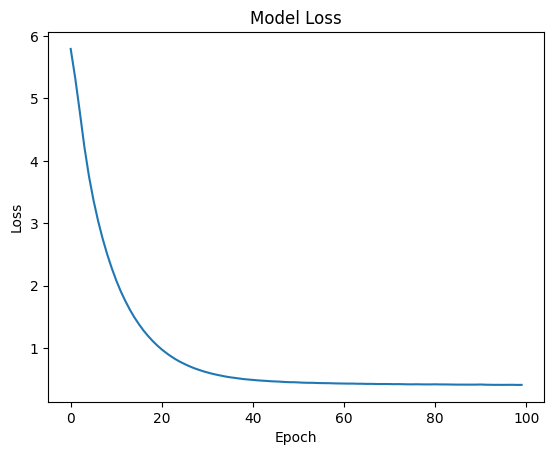

In [10]:
# Visualize training history
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
# Generate lyrics
initial_sentence = "I know I'll survive"
generated_lyrics = initial_sentence

for i in range(100):
    input_sequence = tokenizer.texts_to_sequences([initial_sentence])[0]
    input_sequence = pad_sequences([input_sequence], maxlen=max_sequence_length - 1, padding='pre')
    predicted_word = model.predict(input_sequence, verbose=0)
    next_word_index = np.argmax(predicted_word)
    next_word = tokenizer.index_word[next_word_index]
    generated_lyrics += " " + next_word
    initial_sentence += " " + next_word

print(generated_lyrics)

I know I'll survive let the floor beneath of me fall chorus right in fact it's on my doorstep yeah i want you to do is make sure you're his hide supposed to both knees supposed to both why felt really save me the devotion verse wake in a soul both survive right best dawning knees won't let the rain come through the end i never met me walking in my sky past rhymes story fight reckless story go back to a from the floor mr sober is on your every stop used wishing delicate with every best choose of yourself best whatever it
